In [160]:
import sqlite3
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# set style for seaborn
sns.set_style("whitegrid")
sns.set_context("paper")

WIDTH = 5.8
SMALL_HEIGHT = 3
MEDIUM_HEIGHT = 5
BIGGER_HEIGHT = 7

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title



In [161]:
# connect to database
connection = sqlite3.connect("../output/db/bulk_analysis_2019-11-08_1000ms.db")


In [162]:
# load games and moves into dataframes 
df_game_dirty = pd.read_sql("SELECT * FROM game", connection)
df_move_dirty = pd.read_sql("SELECT * FROM move", connection)

# remove games that are either too short or too long
df_game = remove_outlier(df_game_dirty, "length")
df_move = df_move_dirty[df_move_dirty["game_id"].isin(df_game["id"])]
df_move.head()


,id,fullmove_number,ply_number,turn,san,lan,score,score_change,score_change_category,move_count,...,guarded_pieces_centipawn_all,attacked_guarded_pieces_centipawn_all,unopposed_threats_centipawn_all,threats_centipawn_all,attack_defense_relation1,attack_defense_relation2,material,pawn_ending,rook_ending,game_id
0,1,1,1,1,d4,d2-d4,-10,10,0.20,20,...,5800,0,0,0,0,-600,0,0,0,1
1,2,1,2,0,g6,g7-g6,118,128,2.56,20,...,5800,0,0,0,0,-500,0,0,0,1
2,3,2,3,1,c4,c2-c4,37,81,1.62,28,...,5700,0,0,0,0,-1500,0,0,0,1
3,4,2,4,0,Bg7,Bf8-g7,106,69,1.38,21,...,5900,100,0,0,600,-2100,0,0,0,1
4,5,3,5,1,Nf3,Ng1-f3,43,63,1.26,30,...,5900,100,0,0,900,-1300,0,0,0,1


Text(0.5, 0, 'ply')

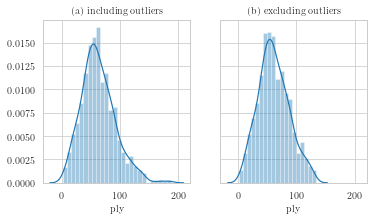

In [163]:
# not clean distribution
f, axes = plt.subplots(1, 2, figsize=(WIDTH, SMALL_HEIGHT), sharex=True, sharey=True)
dist_dirty = sns.distplot(df_game_dirty["length"], ax=axes[0])
axes[0].set_title("(a)~including outliers")
axes[0].set_xlabel("ply")
# not clean distribution
dist_clean = sns.distplot(df_game["length"], ax=axes[1])
axes[1].set_title("(b)~excluding outliers")
axes[1].set_xlabel("ply")
#f.suptitle("Distribution of games according to their length.")
#f.subplots_adjust(top=0.8)

In [164]:
f.tight_layout()
f.savefig("../output/graph/dist_game_length.pdf")


Text(0.5, 0, 'ply')

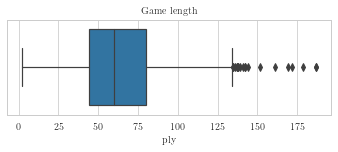

In [165]:
plt.figure(figsize=(WIDTH, 1.75))
box_game_length = sns.boxplot(x=df_game_dirty["length"])
box_game_length.set_title("Game length")
box_game_length.set_xlabel("ply")

In [166]:
fig = box_game_length.get_figure()
fig.tight_layout()
fig.savefig("../output/graph/boxplot_game_length.pdf")


In [167]:
df_game_dirty[["length", "whiteelo", "blackelo"]].describe()


,length,whiteelo,blackelo
count,989.000000,989.000000,989.000000
mean,63.048534,1550.332659,1555.963600
std,29.195136,321.671576,319.934787
min,2.000000,800.000000,800.000000
25%,44.000000,1320.000000,1333.000000
50%,60.000000,1560.000000,1561.000000
75%,80.000000,1782.000000,1796.000000
max,187.000000,2610.000000,2564.000000


In [168]:
df_game[["length", "whiteelo", "blackelo"]].describe()


,length,whiteelo,blackelo
count,968.000000,968.000000,968.000000
mean,61.173554,1549.977273,1555.697314
std,26.423620,322.367607,320.309010
min,2.000000,800.000000,800.000000
25%,43.000000,1318.750000,1332.500000
50%,59.000000,1560.500000,1564.000000
75%,78.000000,1781.250000,1795.000000
max,133.000000,2610.000000,2564.000000


In [169]:
df_move_dirty.query("ply_number <= 133")[["ply_number"]].describe()

,ply_number
count,62009.000000
mean,38.148478
std,27.097166
min,1.000000
25%,16.000000
50%,33.000000
75%,55.000000
max,133.000000


Text(0.5, 0, 'ply')

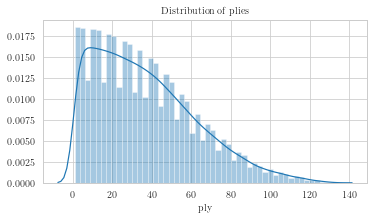

In [170]:
plt.figure(figsize=(WIDTH, SMALL_HEIGHT))
dist_plies = sns.distplot(df_move["ply_number"])
dist_plies.set_title("Distribution of plies")
dist_plies.set_xlabel("ply")


In [171]:
fig = dist_plies.get_figure()
fig.tight_layout()
fig.savefig("../output/graph/dist_plies.pdf")


Text(0, 0.5, 'no. of plies')

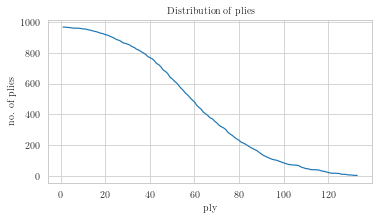

In [172]:
plt.figure(figsize=(WIDTH, SMALL_HEIGHT))
df_plies_count = df_move.groupby(["ply_number"]).size().reset_index(name="count")
line_plies = sns.lineplot(x="ply_number", y="count", data=df_plies_count)
line_plies.set_title("Distribution of plies")
line_plies.set_xlabel("ply")
line_plies.set_ylabel("no. of plies")



In [173]:
fig = line_plies.get_figure()
fig.tight_layout()
fig.savefig("../output/graph/line_plies.pdf")